---

Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

In [245]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Part 3: Regression Model for Predicting Average Price -- Using the ZHVI and Airbnb Listing Data

## a) Putting together Airbnb and Zillow features to predict Price
Let's look at the features we have from the Airbnb Data set and Zillow Data Set and p lot them against price to determine which features, or independent variables, should be used to predict price. We are looking for a linear realtionship which may have to be achieved through transformation.

In [3]:
def read_data(location):
    location = location[['zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']].dropna(axis = 0)
    location = location.set_index('zipcode')
    return location

### ** We are going to join the Zillow data and Airbnb data according to the zip code of the listing to achieve more granularilty when looking at the real estate data for each listing. **

1) We re-read the Airbnb data and create a dataframe containing information on every listing in each city. Set the index to the zip code. 

2) We then merge the real estate data and Airbnb listing data at the zipcode and asess our features.

In [4]:
austin = read_csv('austin.csv')
austin = read_data(austin)
austin['price'] = austin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boston = read_csv('boston.csv')
boston = read_data(boston)
boston['price'] = boston['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dc = read_csv('dc.csv')
dc = read_data(dc)
dc['price'] = dc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

denver = read_csv('denver.csv')
denver = read_data(denver)
denver['price'] = denver['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

la = read_csv('la.csv')
la = read_data(la)
la['price'] = la['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nashville = read_csv('nashville.csv')
nashville = read_data(nashville)
nashville['price'] = nashville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = read_csv('nyc.csv')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

portland = read_csv('portland.csv')
portland = read_data(portland)
portland['price'] = portland['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sandiego = read_csv('sandiego.csv')
sandiego = read_data(sandiego)
sandiego['price'] = sandiego['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

seattle = read_csv('seattle.csv')
seattle = read_data(seattle)
seattle['price'] = seattle['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sf = read_csv('sf.csv')
sf = read_data(sf)
sf['price'] = sf['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

In [5]:
#DataFrame with all listings and Airbnb features:
df_abnb = concat([austin, boston, dc, denver, la, nashville, nyc, portland, sandiego, seattle, sf])

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

### Merge the two feature sets together on zipcode, we now have one dataframe will all the Airbnb and Zillow features/independent variables for predicting price:

In [6]:
df1.head()

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,Zhvi,5Year,10Year,reviewtotal
22204.0,2.0,0.0,1.0,24.0,1,339,3,87.0,9.0,9.0,476100,0.036329,0.005587,105.0
33558.0,2.0,1.0,0.0,66.0,2,364,1,100.0,8.0,8.0,336000,0.070773,-0.007617,116.0
78701.0,4.0,1.0,1.0,150.0,3,365,8,90.0,8.0,9.0,432500,0.074260,0.045489,107.0
78701.0,2.0,1.0,1.0,600.0,1,263,1,100.0,10.0,8.0,432500,0.074260,0.045489,118.0
78701.0,3.0,1.0,1.0,175.0,3,127,4,95.0,10.0,10.0,432500,0.074260,0.045489,115.0


---
## b) Price and Features: Finding Optimal Predictors

### Let's plot the independent variables versus price to determine which features have the strongest linear realtionship with price and which we may have to transform to achieve linearity with price.

### Price and Availability, Price and # of Reviews

We transform Availability and # of Reviews using logs to achieve a linear trend with price.

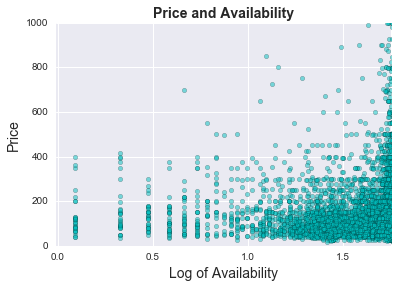

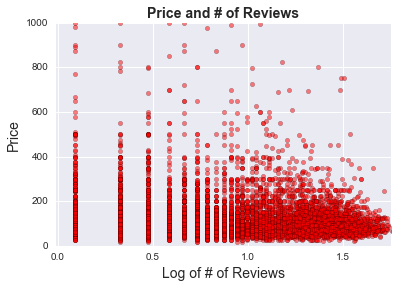

In [241]:
x = np.log(df1['availability_365'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim(0,1000)
plt.xlim(-.01,1.75)

plt.xlabel('Log of Availability', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Availability', fontsize=14, fontweight='bold')

x1 = np.log(df1['number_of_reviews'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'r', alpha = .5)
plt.ylim(0,1000)
plt.xlim(-.01,1.75)

plt.xlabel('Log of # of Reviews', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and # of Reviews', fontsize=14, fontweight='bold')


### Price and ZHVI (Median Home Value)

#### Price and ZHVI (Median Home Value) & Price and 5, 10 Year change in ZHVI

(0.045, 0.15)

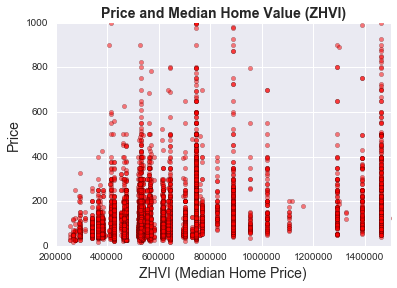

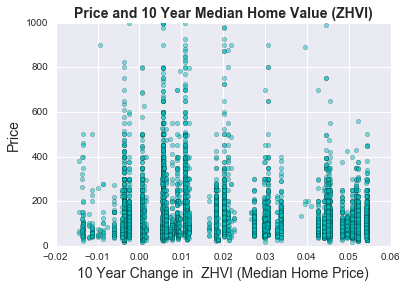

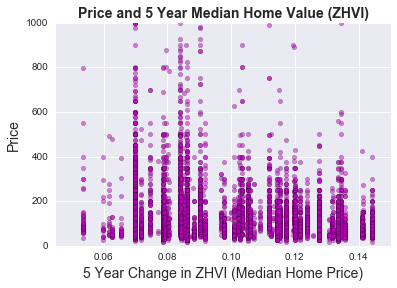

In [243]:
x2 = (df1['Zhvi'])
y2 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x2, y2, c= 'r', alpha = .5)
plt.ylim (0,1000)
plt.xlim (200000,1500000)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x = (df1['10Year'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.02,.06)

plt.xlabel('10 Year Change in  ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 10 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x1 = (df1['5Year'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'm', alpha = .5)

plt.xlabel('5 Year Change in ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 5 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')
plt.ylim (0,1000)
plt.xlim(.045,.15)


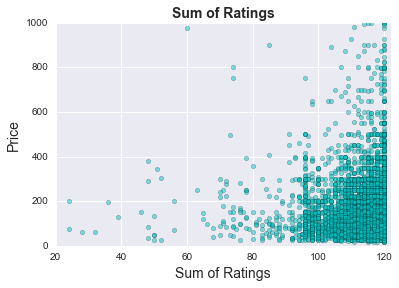

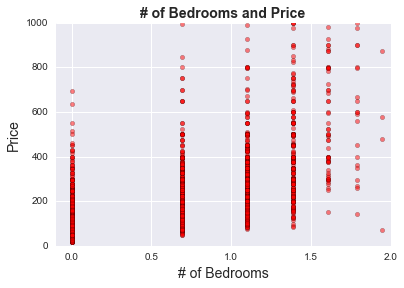

In [247]:
x = (df1['reviewtotal'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(20 ,122)

plt.xlabel('Sum of Ratings', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Sum of Ratings', fontsize=14, fontweight='bold')

x1 = np.log(df1['bedrooms'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c = 'r', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.1 ,2)

plt.xlabel('# of Bedrooms', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms and Price', fontsize=14, fontweight='bold')

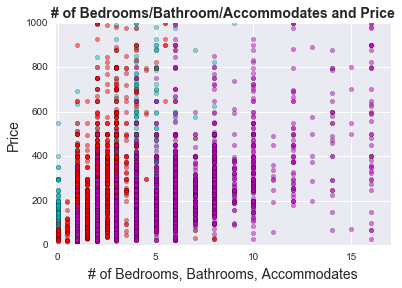

In [248]:
x1 = df1['bedrooms']
x2 = df1['bathrooms']
x3 = df1['accommodates']

y1 = df1['price']


fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'c', alpha = .5)
ax.scatter(x2, y1, c='r', alpha = .5)
ax.scatter(x3, y1, c='m', alpha = .5)
plt.ylim (-2,1000)
plt.xlim(-.1 ,17)

plt.xlabel('# of Bedrooms, Bathrooms, Accommodates', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms/Bathroom/Accommodates and Price', fontsize=14, fontweight='bold')

---
## c) The Model

### Linear Model using all cities and all features:

We are going to create a linear regression model to predict the price of an Airbnb Listing in the US based on the listing data and home value data in these citites:
  - Austin, TX; Boston, MA; Washington, DC; Denver, CO; Los Angeles, CA; Nashville, TN; NYC, NY; Portland, OR; San Diego, CA; Seattle, WA and San Francisco, CA

The Airbnb Features being used are:
 - Log of # of reviews, Log of Availability in the next 365 days, Sum of Ratings (Overall + Value Rating + Accuracy Rating), # of Reviews
 
The Zillow Home Value Data Used:
 - ZHVI (Median Home Price)
 - ZHVI 5 Year Change
 - ZHVI 10 Year Change

** TO ADD** Checking Linear Regression Assumptions:
Linearity
Constant Stanndard Deviation
Normal Distribution of Errors
Independent Errors
Coorelated Predictors

In [11]:
#The merged features dataframe:
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'bedrooms', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)

### Model Evaluation:

In [134]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train))
print 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test))

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train))

coef_df = concat([DataFrame(features.columns), DataFrame(clf.coef_).transpose()], axis = 1)
coef_df.columns = ['Feature', 'Coefficient']
coef_df

R-squared on Training Data: 0.628977301403
R=squared on Testing Data: 0.582747475304
Mean squared error on the test set:  5024.17705553
Mean squared error on the training set:  5362.70770593


,Feature,Coefficient
0,Zhvi,0.000087
1,number_of_reviews,-6.735606
2,availability_365,2.137003
3,reviewtotal,0.689139
4,10Year,-408.656426
5,5Year,66.793779
6,bedrooms,24.282356
7,accommodates,20.307174
8,bathrooms,31.005579


**The r-squared is the cofficient of determination, measures how close the training and tst data are to the fitted regression line. In other words, how good the model will do at predicting the price of a listing based on our selected features. **

**This coefficient of determination tells us that ~58.2% percentage of the total variance in the price of a listing can be explained by the linear regression model. At 58%, a little over half of the variability can be attributed to our model. This is reasonable, but we may be able to achieve better results using other alogrithms for linear regression or by changing our number features or range data included. The test data perfromed somewhat similarly, which is another good sign for the data. The high MSE is a concern, but something that can be corrected by refitting the model.**

**Listed below the r-squares are the regression coefficients for each feature that define the linear relationships in this model. The coefficient for each feature describes how much the listing price changes for a one unit increase in said feature net of all others. The 10 Year change and 5 Year change in median home value seem to be the most powerful predictors. They have a large impact on the price of a listing net of all other features changing. For example,  a one percent increase in home value over 5 years, increases the price of a listing by 109 dollars net of all other features.**

***This is a good starting point for developing the model. We will use the mean squared error along with the r-squared to compare the accuracy and linear fit to others as we try to improve the model. There is definetly room for improvement, especially with MSE and R-squared. ***

### Residual plot:

(-800, 400)

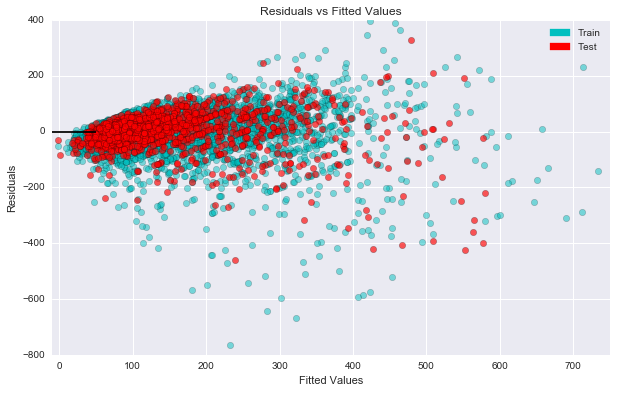

In [254]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(clf.predict(X_train), clf.predict(X_train) - Y_train, c='c', s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - Y_test, c='r', s=40, alpha = 0.65)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='c', label='Train')
green_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, green_patch])
plt.xlim(-10, 750)
plt.ylim(-800,400)

**The residuals here describe the difference in the observed/actual listing price and predicted listing price using the model. The residuals should be distributed randomly above and below to axis tending to cluster towards the middle without any clear patterns. These qualities are indicative of a good linear model, with a normal distribution of data. Normality in the data is important as it is an assumption in creating a linear model. **

**The model seems to be heteroscedastic, meaning that the residuals get larger as the prediction moves from large to small. The model is better at predicting prices for average priced listings at around 300 dollars a night or lower. For those values, the residuals are evenly and randomly distributed above and below the axis with no pattern, indication of a good model.** 

---
## d) Fine-Tuning the Model: Predicting Price for Highly Popular LIstings

We may be able to achieve better prediction and r-squared if we segement the cities by a strong variable such as Availability. Putting similar listings together will result in more coorelation. 

#### Recall from the exploratory analysis above that the most popular cites are those that have the smallest percent average availability in the next year:

In [94]:
# Will work once in the main notebook
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
DataFrame(x).sort(['mean'], ascending=[True])

NameError: name 'statistics' is not defined

#### Segment the Highly Popular (Less that 50% availability in the coming year) from the rest of the samples of cities. We might be able to predict price better for more popular cities.

**Highly Popular Cities:** San Francisco, NYC, Boston, Portland and San Diego




In [19]:
#DataFrame with Airbnb data on highly popular cities:
df_abnb = concat([sf, nyc, boston, portland, sandiego])

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'bedrooms', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [154]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train))
print 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test))

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train))

coef_df = concat([DataFrame(features.columns), DataFrame(clf.coef_).transpose()], axis = 1)
coef_df.columns = ['Feature', 'Coefficient']
coef_df

R-squared on Training Data: 0.608282243074
R=squared on Testing Data: 0.677236832578
Mean squared error on the test set:  4240.57837007
Mean squared error on the training set:  5555.82512692


,Feature,Coefficient
0,Zhvi,0.000090
1,number_of_reviews,-7.036112
2,availability_365,2.267287
3,reviewtotal,0.632213
4,10Year,-377.856945
5,5Year,84.544294
6,bedrooms,23.379587
7,accommodates,20.149677
8,bathrooms,29.987966


**The R-squared is a percentage that tells us how much of variance in y can be explained by the model, the higher the percent the more the model fits the data. This model's coefficient of determination tells us that ~ 67.78% percentage of the total variance in the price of a listing from a popular city can be explained by the linear regression model.**

** At 68%, more than two thirds of the variability can be attributed to our model. This is much higher than our original linear model using all cities. This better result proves that by grouping the most popular cities, we have created a stronger linear model. The most popular cities listing prices react similarly to changes in the features and create a better linear fit. The MSE is also reduced, another indication that by taking a subset we hae created a better model. **

***This is a good starting point for developing a better model by manipulating the data set, however we may be able to increase the level of fit by using another alogrithim to create a linear model. ***

(-800, 400)

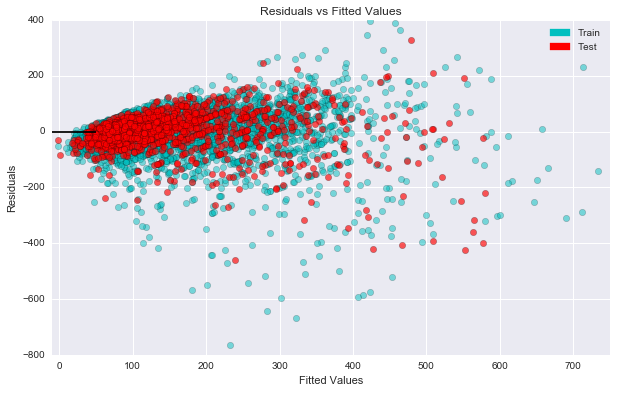

In [253]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(clf.predict(X_train), clf.predict(X_train) - Y_train, c='c', s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - Y_test, c='r', s=40, alpha = 0.65)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='c', label='Train')
green_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, green_patch])
plt.xlim(-10,750)
plt.ylim(-800, 400)

**The model seems to be less heteroscedastic than the previous one. The range of the residuals looks to be tighter around the axis and still display no pattern, indicative that we have retained normality in this new subset of our data. ** 

## e) Using the Random Forest Regression Model
Test using the Random Forest Regression model on our popular cities data to see if it results in a better fitting model. 

The Random Forest model uses an algorithm which 'bootstraps'(taking of many random samples from the training data) to create a nodes that build a decision or regression tree which models the behavior of the data to create a linear model. 

Lets see how it works with our popular cities data:

In [188]:
from sklearn.ensemble import RandomForestRegressor

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, Y_train)

print "R-squared for training data: ", rf.score(X_train,Y_train) 
print "R-squared for test data: ", rf.score(X_test,Y_test) 

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, rf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, rf.predict(X_train))


R-squared for training data:  0.933659508976
R-squared for test data:  0.686724103487
Mean squared error on the test set:  4707.57379474
Mean squared error on the training set:  909.569943865


The fit has definetly increased! The model now has an r-squared of almost 70%, much higher than both initial models.It's also worth mentioning the impressive 93% fit for the training data. The mean square errors are also drasticallty reduced from around the mid 4000's to much lower values.

In [ ]:
#Creating regression model for evaluating Random Forest (in progress:)

In [237]:
(DataFrame((rf.predict(X_train))) - Y_train).shape

(5862, 1)

In [236]:
rf.predict(X_train)

array([ 125. ,  383.5,   65.5, ...,  103.8,  102.8,   93.5])

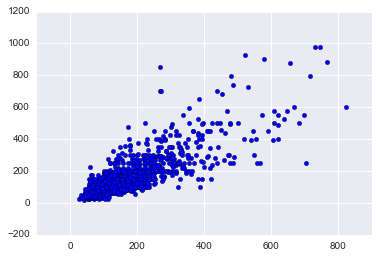

In [191]:
plt.scatter(rf.predict(X_test), Y_test.as_matrix())

In [204]:
Y_train.shape

(5862, 1)

ValueError: x and y must be the same size

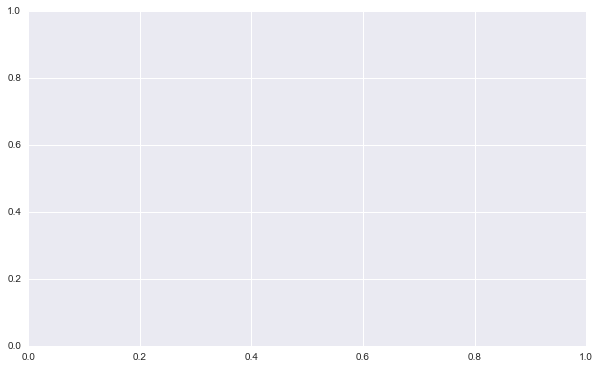

In [230]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(rf.predict(X_train), (((rf.predict(X_train))) - Y_train), c='b', s=40, alpha=0.5)
plt.scatter(rf.predict(X_test), (((rf.predict(X_test))) - Y_test), c='g', s=40)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='b', label='Train')
green_patch = mpatches.Patch(color ='g', label='Test')
plt.legend(handles=[blue_patch, green_patch])
plt.xlim(-10, 750)
plt.ylim(-800,400)